Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cyl_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_cyl.csv?raw=true', compression=None)
hook_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_hook.csv?raw=true', compression=None)
lat_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_lat.csv?raw=true', compression=None)
palm_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_palm.csv?raw=true', compression=None)
spher_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_spher.csv?raw=true', compression=None)
tip_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_tip.csv?raw=true', compression=None)

In [ ]:
cyl_01 = cyl_00.drop(cyl_00.columns[0], axis=1)
hook_01 = hook_00.drop(hook_00.columns[0], axis=1)
lat_01 = lat_00.drop(lat_00.columns[0], axis=1)
palm_01 = palm_00.drop(palm_00.columns[0], axis=1)
spher_01 = spher_00.drop(spher_00.columns[0], axis=1)
tip_01 = tip_00.drop(tip_00.columns[0], axis=1)

In [ ]:
cyl = np.array_split(cyl_01, 100, axis=1)
hook = np.array_split(hook_01, 100, axis=1)
lat = np.array_split(lat_01, 100, axis=1)
palm = np.array_split(palm_01, 100, axis=1)
spher = np.array_split(spher_01, 100, axis=1)
tip = np.array_split(tip_01, 100, axis=1)

In [ ]:
def concatDf (df):
  aux_df = pd.DataFrame(columns = df[0].columns)

  for i in range (100):
  
    a = df[i].T.reset_index(drop=True).T
    aux_df = pd.concat([aux_df,a])

  aux_df_2 = aux_df.reset_index(drop=True)

  return aux_df_2

In [ ]:
cyl_DA = concatDf (cyl)
hook_DA = concatDf(hook)
lat_DA = concatDf(lat)
palm_DA = concatDf(palm)
spher_DA = concatDf(spher)
tip_DA = concatDf(tip)

Definição da matriz de entrada *x*

In [ ]:
x_00 = pd.concat([cyl_DA,hook_DA,lat_DA,palm_DA,spher_DA,tip_DA], ignore_index=True)
x = pd.DataFrame(x_00)
x = x.dropna(axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1) #Comando necessário para colocar a matriz de entrada x em um formato compatível com os neurônios de um CNN. Neste caso, foi necessário fazer uma camada de profundidade igual a 1.
print(x.shape)

(90000, 30, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((15000,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
mov = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])
y = pd.DataFrame(mov)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


CNN 1D - MODELO 1

In [ ]:
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

from keras.utils.vis_utils import plot_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 128)           512       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 128)           49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 128)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 64)             41024     
                                                                 
 conv1d_3 (Conv1D)           (None, 5, 64)             20544     
                                                                 
 conv1d_4 (Conv1D)           (None, 5, 64)             4160      
                                                        

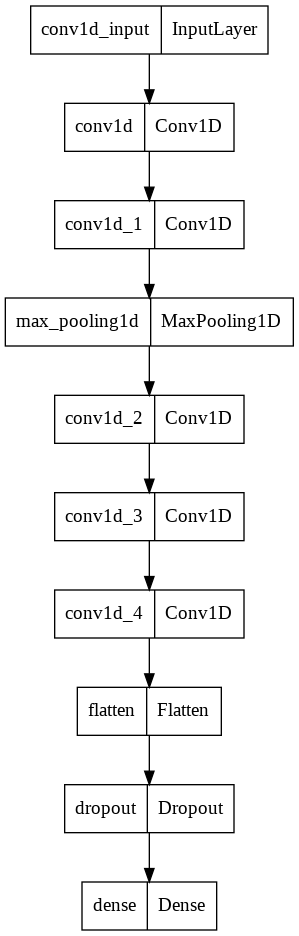

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(Conv1D(64, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

plot_model(model, to_file="model.png")

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
treino = model.fit(x_train, y_train, batch_size=32, epochs=400)

Epoch 1/400
1885/1885 [==============================] - 27s 14ms/step - loss: 1.4464 - accuracy: 0.3684
Epoch 2/400
1885/1885 [==============================] - 27s 14ms/step - loss: 1.3402 - accuracy: 0.4232
Epoch 3/400
1885/1885 [==============================] - 27s 14ms/step - loss: 1.2964 - accuracy: 0.4507
Epoch 4/400
1885/1885 [==============================] - 26s 14ms/step - loss: 1.2651 - accuracy: 0.4676
Epoch 5/400
1885/1885 [==============================] - 26s 14ms/step - loss: 1.2412 - accuracy: 0.4825
Epoch 6/400
1885/1885 [==============================] - 26s 14ms/step - loss: 1.2225 - accuracy: 0.4897
Epoch 7/400
1885/1885 [==============================] - 26s 14ms/step - loss: 1.2043 - accuracy: 0.5006
Epoch 8/400
1885/1885 [==============================] - 26s 14ms/step - loss: 1.1909 - accuracy: 0.5053
Epoch 9/400
1885/1885 [==============================] - 26s 14ms/step - loss: 1.1755 - accuracy: 0.5150
Epoch 10/400
1885/1885 [==============================]

In [ ]:
avaliacao = model.evaluate(x_train,y_train)

1885/1885 [==============================] - 8s 4ms/step - loss: 0.3891 - accuracy: 0.8499


Avaliação do Modelo via Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1845  785  368  522  798  591]
 [ 927 1991  386  371  924  311]
 [ 344  310 2068  618  144 1588]
 [ 550  379  753 1702  334 1236]
 [ 853 1004  224  285 2391  264]
 [ 459  258  851  686  161 2419]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.37584029, 0.40549898, 0.40772871, 0.34356076, 0.47619996,
       0.50041374])

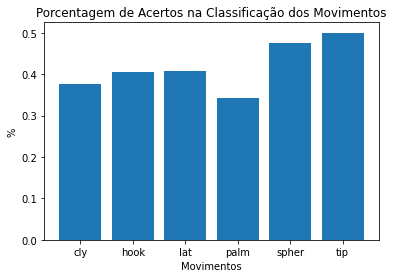

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.05440499114966303

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

     |████████████████████████████████| 11.3 MB 5.3 MB/s 
     |████████████████████████████████| 191 kB 63.0 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 15.7 MB 57.6 MB/s 
     |████████████████████████████████| 103 kB 55.6 MB/s 
     |████████████████████████████████| 11.2 MB 56.0 MB/s 
     |████████████████████████████████| 156 kB 67.3 MB/s 
     |████████████████████████████████| 843 kB 57.4 MB/s 
     |████████████████████████████████| 68 kB 7.9 MB/s 
     |████████████████████████████████| 41 kB 698 kB/s 
     |████████████████████████████████| 890 kB 62.1 MB/s 
     |████████████████████████████████| 6.5 MB 62.3 MB/s 
     |████████████████████████████████| 596 kB 65.0 MB/s 
     |████████████████████████████████| 98 kB 8.1 MB/s 
     |████████████████████████████████| 461 kB 71.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalle

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

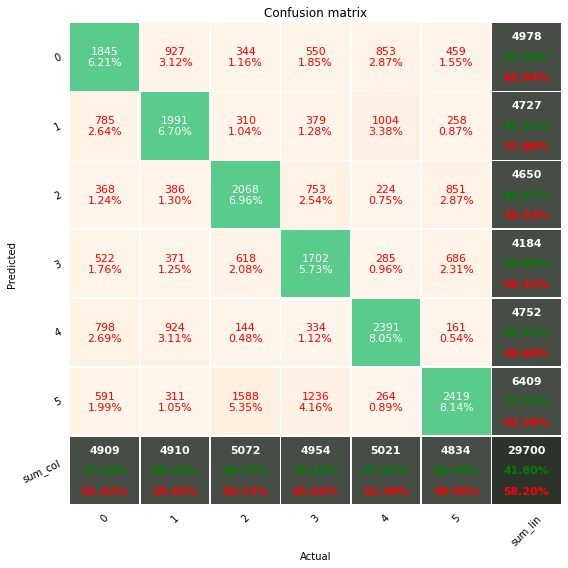

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

pp_matrix(df_cm)